In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
import numpy as np

In [2]:
employee = pd.read_csv('../data/employee.csv',
 parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [3]:
import seaborn as sns

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

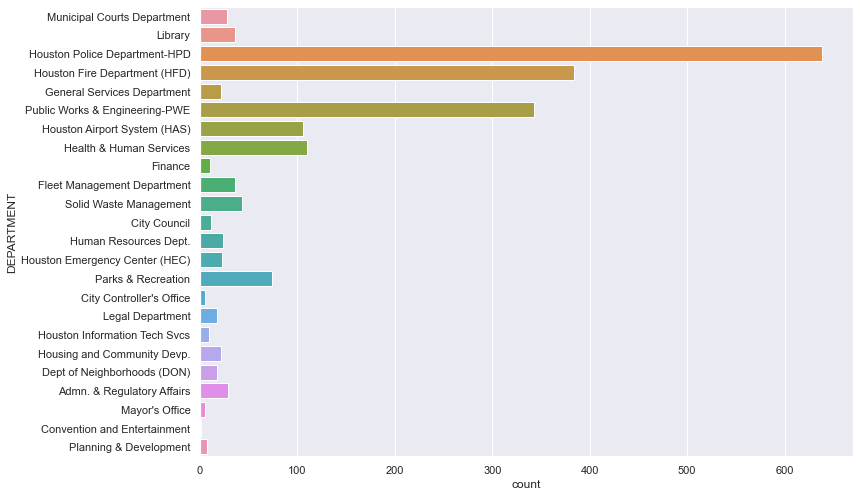

In [8]:
sns.countplot(y='DEPARTMENT', data=employee)

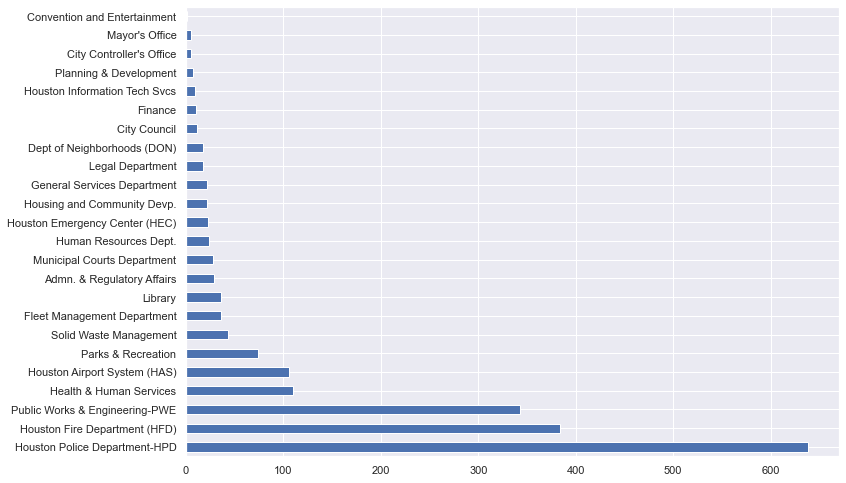

In [11]:
employee['DEPARTMENT'].value_counts().plot(kind = 'barh')

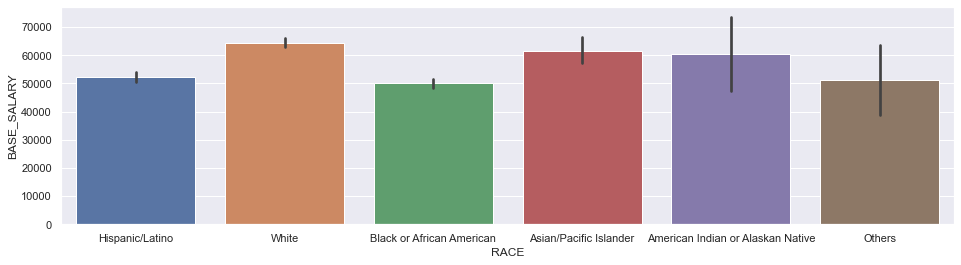

In [10]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee)
ax.figure.set_size_inches(16, 4)

Text(0, 0.5, 'Mean Salary')

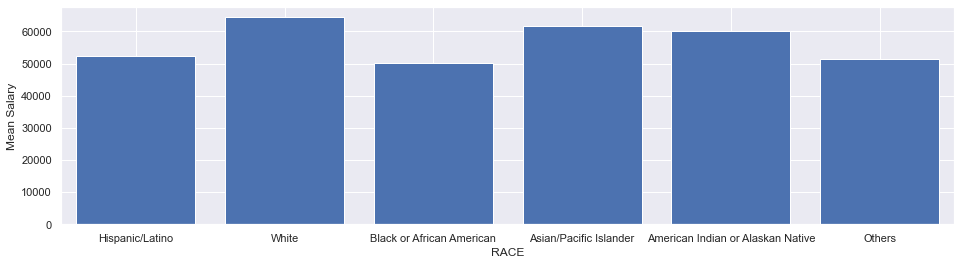

In [21]:
avg_sal = employee.groupby('RACE', sort=False) \
 ['BASE_SALARY'].mean()
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('Mean Salary')

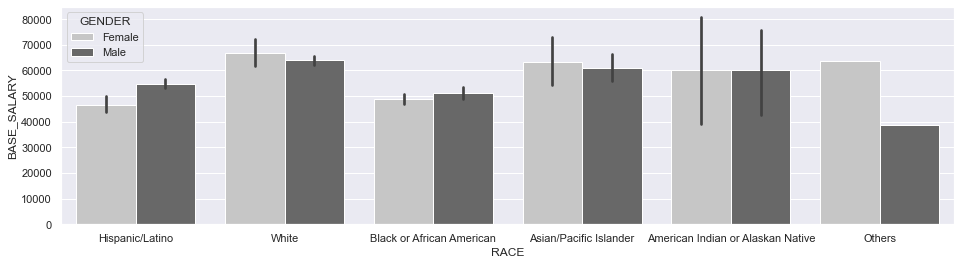

In [13]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER',
 data=employee, palette='Greys')
ax.figure.set_size_inches(16,4)

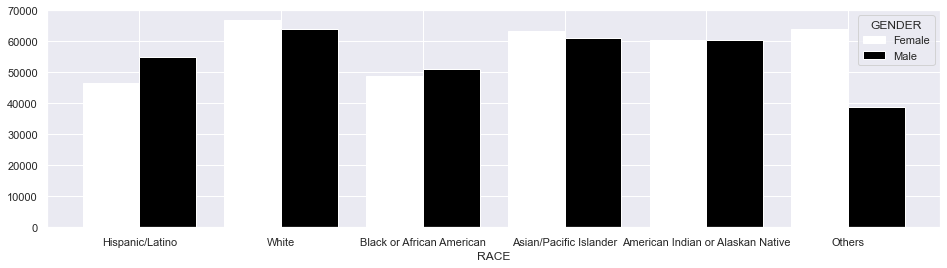

In [14]:
employee.groupby(['RACE', 'GENDER'], sort=False) \
 ['BASE_SALARY'].mean().unstack('GENDER') \
 .plot(kind='bar', figsize=(16,4), rot=0,
 width=.8, cmap='Greys')

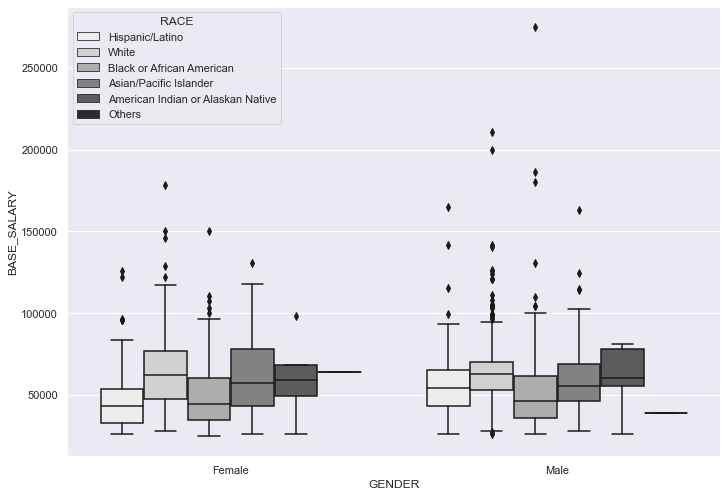

In [15]:
sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee,
hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

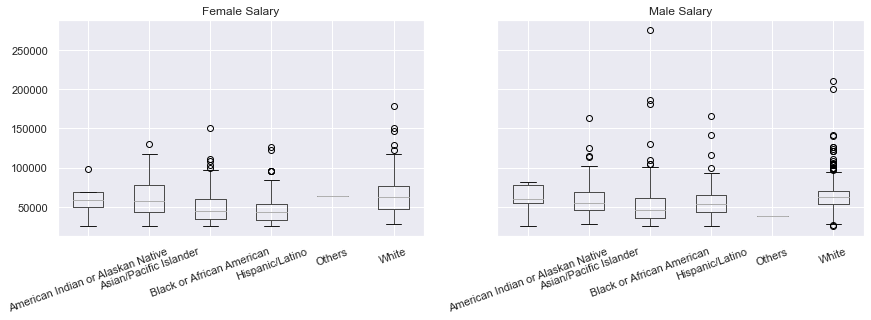

In [16]:
fig, ax_array = plt.subplots(1, 2, figsize=(14,4), sharey=True)
for g, ax in zip(['Female', 'Male'], ax_array):
    employee.query('GENDER== @g') \
    .boxplot(by='RACE', column='BASE_SALARY',
    ax=ax, rot=20)
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
fig.suptitle('')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

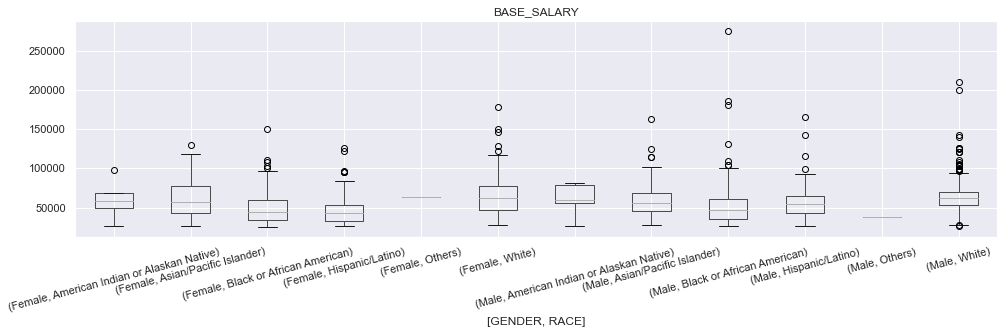

In [22]:
ax = employee.boxplot(by=['GENDER', 'RACE'],
 column='BASE_SALARY',
 figsize=(16,4), rot=15)
ax.figure.suptitle('')